In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
from tensorflow import keras
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style= "darkgrid", color_codes = True)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Set the path to the dataset
dataset_path = '/content/drive/MyDrive/Nagri Datasets'

# Initialize empty lists for storing the images and labels
images = []
labels = []

# Loop over the subfolders in the dataset
for subfolder in os.listdir(dataset_path):

    subfolder_path = os.path.join(dataset_path, subfolder)
    if not os.path.isdir(subfolder_path):
        continue

  # Loop over the images in the subfolder
    for image_filename in os.listdir(subfolder_path):
       # Load the image and store it in the images list
        image_path = os.path.join(subfolder_path, image_filename)
        images.append(image_path)

        # Store the label for the image in the labels list
        labels.append(subfolder)

 # Create a pandas DataFrame from the images and labels
df = pd.DataFrame({'image': images, 'label': labels})

In [ ]:
df

,image,label
0,/content/drive/MyDrive/Nagri Datasets/0/0- (43...,0
1,/content/drive/MyDrive/Nagri Datasets/0/0- (41...,0
2,/content/drive/MyDrive/Nagri Datasets/0/0- (41...,0
3,/content/drive/MyDrive/Nagri Datasets/0/0- (43...,0
4,/content/drive/MyDrive/Nagri Datasets/0/0- (42...,0
...,...,...
4683,/content/drive/MyDrive/Nagri Datasets/9/9- (33...,9
4684,/content/drive/MyDrive/Nagri Datasets/9/9- (33...,9
4685,/content/drive/MyDrive/Nagri Datasets/9/9- (33...,9
4686,/content/drive/MyDrive/Nagri Datasets/9/9- (33...,9


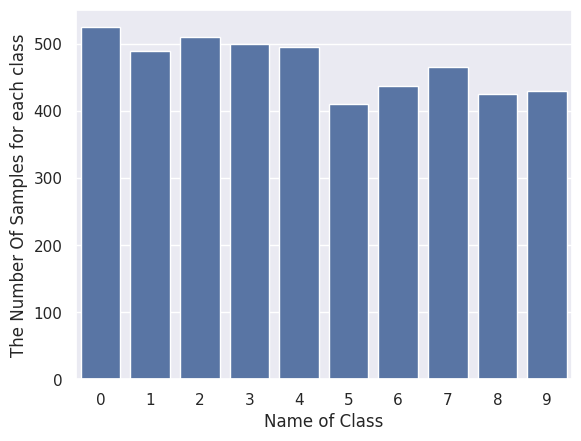

In [ ]:
# plot the classes
ax = sns.countplot(x=df.label)

# Set labels and titles
ax.set_xlabel("Name of Class")
ax.set_ylabel("The Number Of Samples for each class")

# Rotate x-axis labels if needed
plt.xticks(rotation=0)

# Display the plot
plt.show()

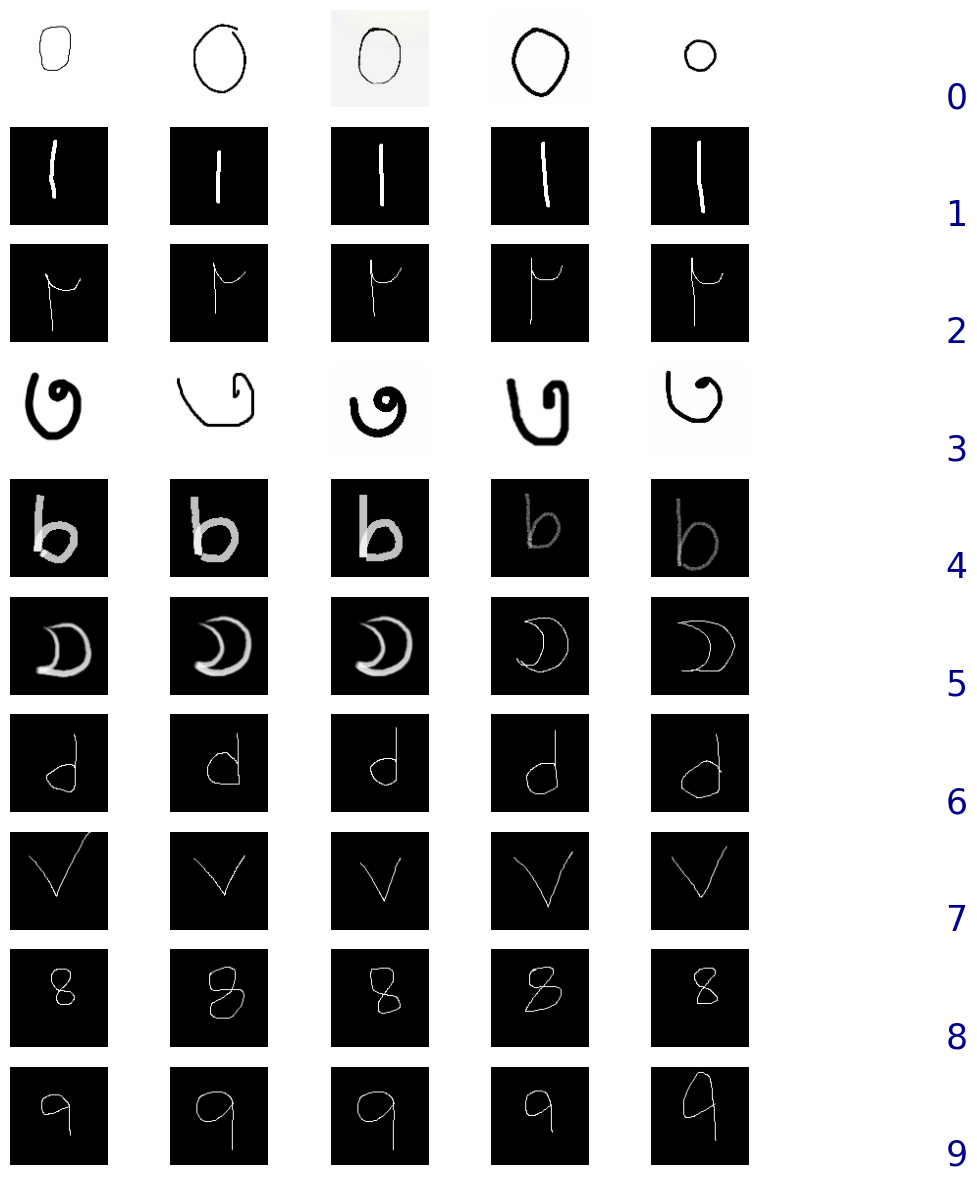

In [ ]:
from matplotlib.gridspec import GridSpec
# Create figure and grid of subplots
fig = plt.figure(figsize=(10, 15))
gs = GridSpec(10, 5, figure=fig)

# Loop through each unique category in the DataFrame
for i, category in enumerate(df['label'].unique()):
    # Get the filepaths for the first five images in the category
    filepaths = df[df['label'] == category]['image'].values[:5]

    # Loop through the filepaths and add an image to each subplot
    for j, filepath in enumerate(filepaths):
        ax = fig.add_subplot(gs[i, j])
        ax.imshow(plt.imread(filepath))
        ax.axis('off')

    # Add a label to the bottom of the subplot grid
    ax.text(300, 100, category, fontsize=25, color='darkblue')

plt.show()

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['image'], df['label'], test_size=0.2, random_state=42)

# Create a dataframe for the training data
df_train = pd.DataFrame({'image': X_train, 'label': y_train})

# Create a dataframe for the test data
df_test = pd.DataFrame({'image': X_test, 'label': y_test})

# Encode the labels
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [ ]:
X_train.size

3750

In [ ]:
X_test.size

938

In [ ]:
df_train.size

7500

In [ ]:
df_test.size

1876

In [ ]:
df.size

9376

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
# Set the image size and batch size
image_size = (50, 50)
batch_size = 32

# Create an ImageDataGenerator object with data augmentation options for image preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    #horizontal_flip=True,
    fill_mode='nearest'
)


# Create a generator for the training data
train_generator = datagen.flow_from_dataframe(
    df_train,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# Create a generator for the test data
test_generator = datagen.flow_from_dataframe(
    df_test,
    x_col='image',
    y_col='label',
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 3750 validated image filenames belonging to 10 classes.
Found 938 validated image filenames belonging to 10 classes.


In [ ]:
df.size

9376

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
# Set the input shape for the model
input_shape = (50, 50, 3)

# Create a Sequential model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
# Train the model on the training data
history = model.fit_generator(train_generator,epochs=20,validation_data=test_generator)

Epoch 1/20
118/118 [==============================] - 1147s 10s/step - loss: 1.8400 - accuracy: 0.3715 - val_loss: 1.2818 - val_accuracy: 0.5778
Epoch 2/20
118/118 [==============================] - 43s 367ms/step - loss: 1.1122 - accuracy: 0.6496 - val_loss: 0.8820 - val_accuracy: 0.7292
Epoch 3/20
118/118 [==============================] - 45s 384ms/step - loss: 0.8148 - accuracy: 0.7509 - val_loss: 0.8807 - val_accuracy: 0.7367
Epoch 4/20
118/118 [==============================] - 45s 379ms/step - loss: 0.6432 - accuracy: 0.8091 - val_loss: 0.5521 - val_accuracy: 0.8326
Epoch 5/20
118/118 [==============================] - 43s 366ms/step - loss: 0.5120 - accuracy: 0.8448 - val_loss: 0.4946 - val_accuracy: 0.8518
Epoch 6/20
118/118 [==============================] - 44s 377ms/step - loss: 0.4804 - accuracy: 0.8608 - val_loss: 0.4488 - val_accuracy: 0.8561
Epoch 7/20
118/118 [==============================] - 46s 389ms/step - loss: 0.4110 - accuracy: 0.8755 - val_loss: 0.3625 - val_ac

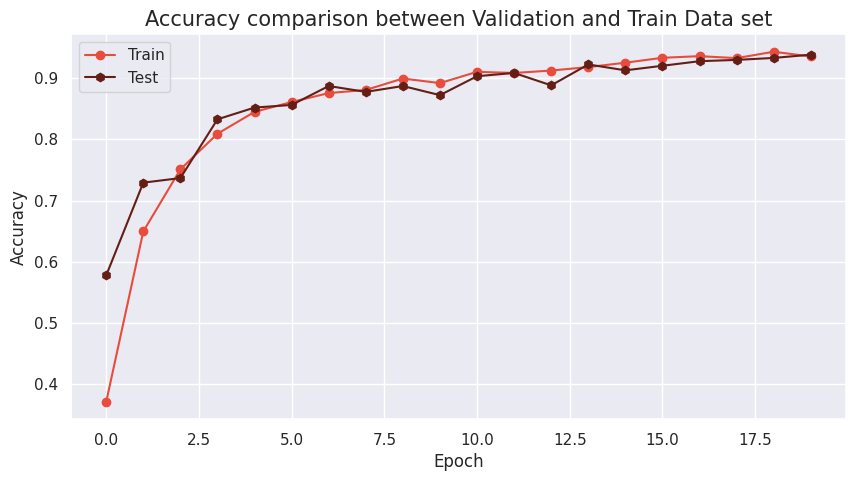

In [ ]:
#Accuracy comparison between Validation and Train Data set
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'],color="#E74C3C",marker='o')
plt.plot(history.history['val_accuracy'],color='#641E16',marker='h')
plt.title('Accuracy comparison between Validation and Train Data set',fontsize=15)
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

In [ ]:
# Evaluate the model on the test data
metrics = model.evaluate(test_generator)
# Print the accuracy of the model
print('Accuracy:', metrics[1])

30/30 [==============================] - 6s 205ms/step - loss: 0.1936 - accuracy: 0.9435
Accuracy: 0.943496823310852


30/30 [==============================] - 6s 196ms/step - loss: 0.2107 - accuracy: 0.9350
Accuracy: 0.9349679946899414
30/30 [==============================] - 7s 228ms/step


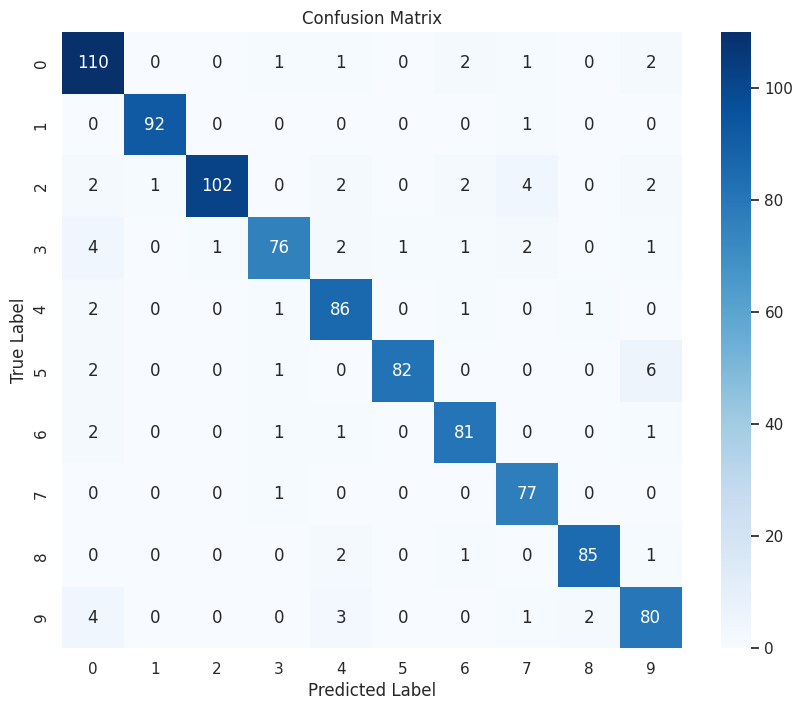

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Evaluate the model on the test data
metrics = model.evaluate(test_generator)
print('Accuracy:', metrics[1])

# Get predictions for the test data
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels for the test data
y_true = test_generator.labels

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Display confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
#ConfusionMatrixDisplay(conf_matrix, display_labels=test_generator.class_indices.keys()).plot()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
from sklearn.metrics import classification_report

# Get predictions for the test data
y_pred = model.predict(test_generator)
y_pred_classes = np.argmax(y_pred, axis=1)

# Get true labels for the test data
y_true = test_generator.labels

# Generate classification report
class_report = classification_report(y_true, y_pred_classes, target_names=test_generator.class_indices.keys())

# Print classification report
print("Classification Report:\n", class_report)


30/30 [==============================] - 7s 217ms/step
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.92      0.93       117
           1       0.96      0.98      0.97        93
           2       0.97      0.92      0.95       115
           3       0.92      0.82      0.87        88
           4       0.90      0.95      0.92        91
           5       0.98      0.93      0.96        91
           6       0.90      0.94      0.92        86
           7       0.92      0.99      0.95        78
           8       0.93      0.94      0.94        89
           9       0.90      0.93      0.92        90

    accuracy                           0.93       938
   macro avg       0.93      0.93      0.93       938
weighted avg       0.93      0.93      0.93       938



In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 24, 24, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 11, 11, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 128)         0

In [ ]:
# Save the model
model.save('CNN_model.h5')
print ("Model saved successfully!")

Model saved successfully!


1/1 [==============================] - 0s 86ms/step


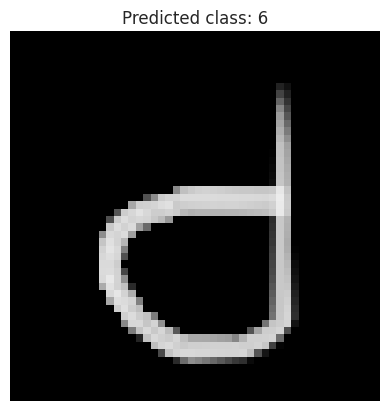

In [ ]:
# For Black Background
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the saved model
model = keras.models.load_model('CNN_model.h5')

# Function to predict a new digit image
def predict_and_show(image_path):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(50, 50))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array /= 255.0  # Normalize pixel values to [0, 1]

    # Make prediction
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)

    # Show the image and prediction result
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Predicted class: {predicted_class}')
    plt.show()

# Example usage:
new_image_path = '/content/drive/MyDrive/Nagri Datasets/6/6- (100).png'
predict_and_show(new_image_path)

1/1 [==============================] - 0s 99ms/step


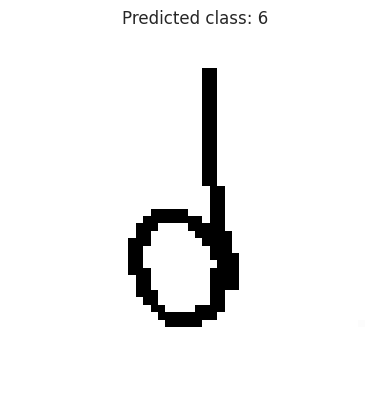

In [ ]:
#White background
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the saved model
model = keras.models.load_model('CNN_model.h5')

# Function to predict a new digit image
def predict_and_show(image_path):
    # Load and preprocess the image
    img = image.load_img(image_path, target_size=(50, 50))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    # Invert black and white colors
    inverted_img_array = 255 - img_array

    # Normalize pixel values to [0, 1]
    img_array = inverted_img_array / 255.0

    # Make prediction
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)

    # Show the image and prediction result
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'Predicted class: {predicted_class}')
    plt.show()

# Example usage:
new_image_path = '/content/drive/MyDrive/White Nagri Digits/6/6- (1).png'
predict_and_show(new_image_path)


**Without black-white image**

1/1 [==============================] - 0s 105ms/step


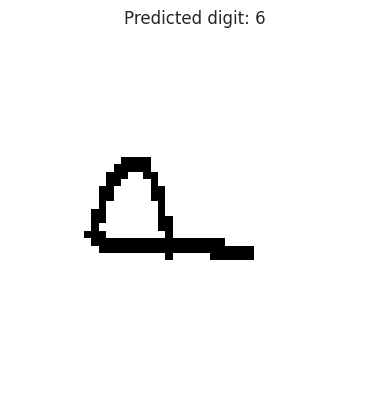

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image_path = '/content/drive/MyDrive/Handwritten Digits/6/6 (13).jpg'
image = Image.open(image_path)

# Convert the image to grayscale
image_gray = image.convert('L')

# Resize the image to 100x100 pixels
image_resized = image_gray.resize((100, 100))

# Convert the image to black and white format
threshold = 127.5
image_bw = image_resized.point(lambda x: 0 if x < threshold else 255, '1')

'''# Display the resized and converted image
plt.imshow(image_bw, cmap='gray')
plt.axis('off')
plt.title('Black and White Image')
plt.show()'''

import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the saved model
model = keras.models.load_model('CNN_model.h5')

# Function to preprocess the image and make prediction
def predict_stored_image(image_array):
    # Resize the image to 50x50 pixels
    image_resized = image_array.resize((50, 50))

    # Convert image to RGB format
    image_rgb = image_resized.convert('RGB')

    # Convert image to array and add batch dimension
    img_array = np.array(image_rgb)
    img_array = np.expand_dims(img_array, axis=0)

    # Normalize pixel values to [0, 1]
    img_array = img_array.astype('float32') / 255.0

    # Make prediction
    prediction = model.predict(img_array)
    predicted_class = np.argmax(prediction)

    # Show the image and prediction result
    plt.imshow(image_resized, cmap='gray')
    plt.axis('off')
    plt.title(f'Predicted digit: {predicted_class}')
    plt.show()

# Example usage:
# Assuming you already have the image stored in a variable named 'image_bw'
predict_stored_image(image_bw)



In [ ]:
image_bw.size

(100, 100)